#Self Organizing Map

##Install MiniSom Package

In [ ]:
!pip install MiniSom

### Importing the libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

The dataset is from UCI Machine Learning Repository.
URL:https://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)

In [ ]:
dataset = pd.read_csv('drive/MyDrive/Deep-learning-A-to-Z/SOM/Credit_Card_Applications.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
X

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, ..., 2.0000000e+00,
        1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, ..., 2.0000000e+00,
        2.8000000e+02, 1.0000000e+00],
       ...,
       [1.5675450e+07, 0.0000000e+00, 1.8830000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.0000000e+00],
       [1.5776494e+07, 0.0000000e+00, 2.7420000e+01, ..., 2.0000000e+00,
        1.2000000e+02, 1.2000000e+01],
       [1.5592412e+07, 1.0000000e+00, 4.1000000e+01, ..., 1.0000000e+00,
        5.6000000e+02, 1.0000000e+00]])

In [ ]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

Cause we are doing SOM (An unsupervised learning model), so the dependent variable is not going to use in the model.

## Feature Scaling

Cause we are doing high dimensional deep learning model, feature scaling is a better way to decrease the computing time for a model.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

In [ ]:
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

##Training the SOM

We are going to use the library of miniSOM. 

Import the libraray


In [ ]:
from minisom import MiniSom

In [ ]:
som = MiniSom(x=10, y=10, input_len=15, random_seed=42)

Initialize the initial weights for the SOM model.

In [ ]:
som.random_weights_init(X)

Train the model.


In [ ]:
som.train_random(X, num_iteration=100)

##Visualizing the results


In [ ]:
from pylab import bone, pcolor, colorbar, plot, show

## Finding the frauds


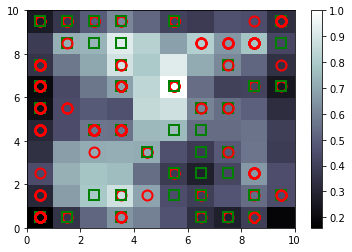

In [ ]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['red', 'green']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0]+0.5,
       w[1]+0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show()

In [ ]:
mapping = som.win_map(X)
frauds = mapping[(5,6)]
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [ ]:
frauds

array([[1.5786237e+07, 0.0000000e+00, 1.9170000e+01, 5.8500000e-01,
        1.0000000e+00, 6.0000000e+00, 4.0000000e+00, 5.8500000e-01,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.6000000e+02, 1.0000000e+00],
       [1.5767358e+07, 0.0000000e+00, 4.9830000e+01, 1.3585000e+01,
        2.0000000e+00, 4.0000000e+00, 8.0000000e+00, 8.5000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.5567839e+07, 0.0000000e+00, 2.8580000e+01, 3.5400000e+00,
        2.0000000e+00, 3.0000000e+00, 5.0000000e+00, 5.0000000e-01,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.7100000e+02, 1.0000000e+00],
       [1.5671014e+07, 0.0000000e+00, 2.5330000e+01, 2.0850000e+00,
        2.0000000e+00, 8.0000000e+00, 8.0000000e+00, 2.7500000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00,

In [ ]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15786237
15767358
15567839
15671014
15579583
15642336
15740487
15593345
15811742
15702571
15622083
15646190
15715907
15768342
15748532
15689692
15672357
15788634
